In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pandas as pd

In [ ]:
data=pd.read_csv("/content/weather_1.csv")  #load the dataset
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain


In [ ]:
data.shape  #Check the no of rows=1461 and colomns=6

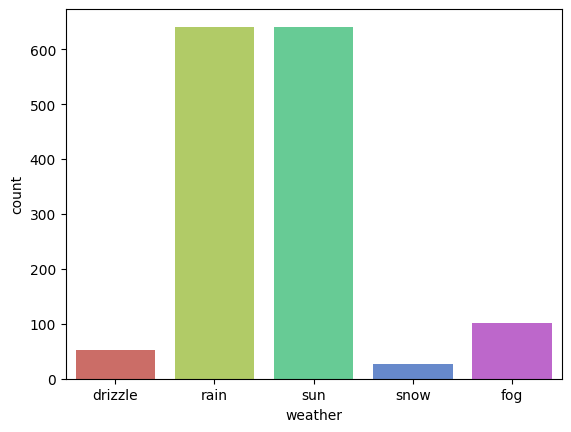

In [ ]:
import warnings  # for categorization the count of each unique value in the 'weather' column which could be useful for understanding the distribution of weather conditions in the dataset.
warnings.filterwarnings('ignore')
sns.countplot(x="weather", data=data, palette='hls')
plt.show()

In [ ]:
countrain=len(data[data.weather=='rain'])  #checking percentages
countsun=len(data[data.weather=='sun'])
countdrizzle=len(data[data.weather=='drizzle'])
countsnow=len(data[data.weather=='snow'])
countfog=len(data[data.weather=='fog'])
print('percent of rain:{:2f}%'.format((countrain/(len(data.weather))*100)))
print('percent of sun:{:2f}%'.format((countsun/(len(data.weather))*100)))
print('percent of drizzle:{:2f}%'.format((countdrizzle/(len(data.weather))*100)))
print('percent of snow:{:2f}%'.format((countsnow/(len(data.weather))*100)))
print('percent of fog:{:2f}%'.format((countfog/(len(data.weather))*100)))

percent of rain:43.874059%
percent of sun:43.805613%
percent of drizzle:3.627652%
percent of snow:1.779603%
percent of fog:6.913073%


In [ ]:
data[['precipitation','temp_max','temp_min','wind']].describe()  # for calculating descriptive statistics

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<Axes: xlabel='wind', ylabel='Count'>

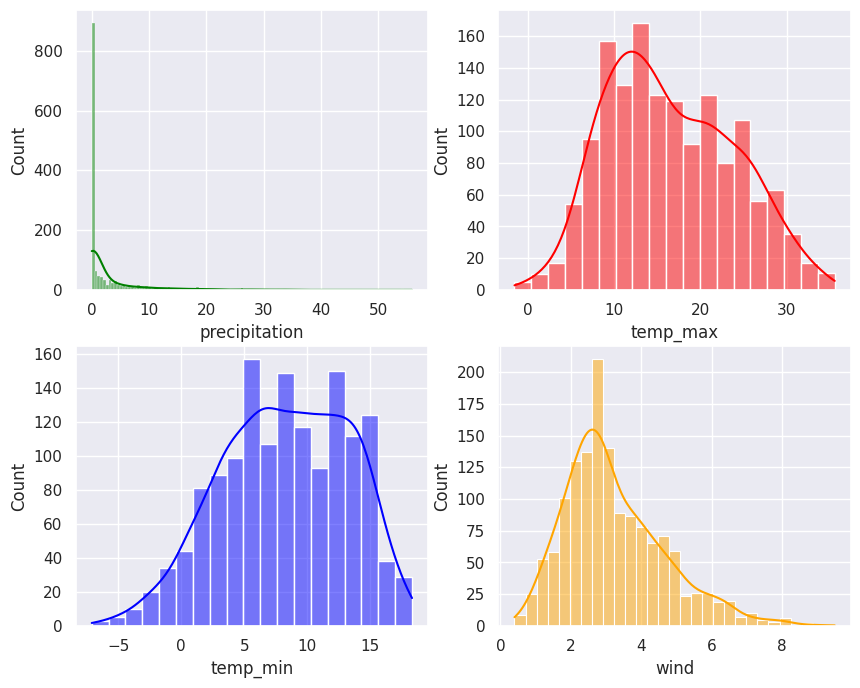

In [ ]:
sns.set(style='darkgrid')   # for data distribution
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')

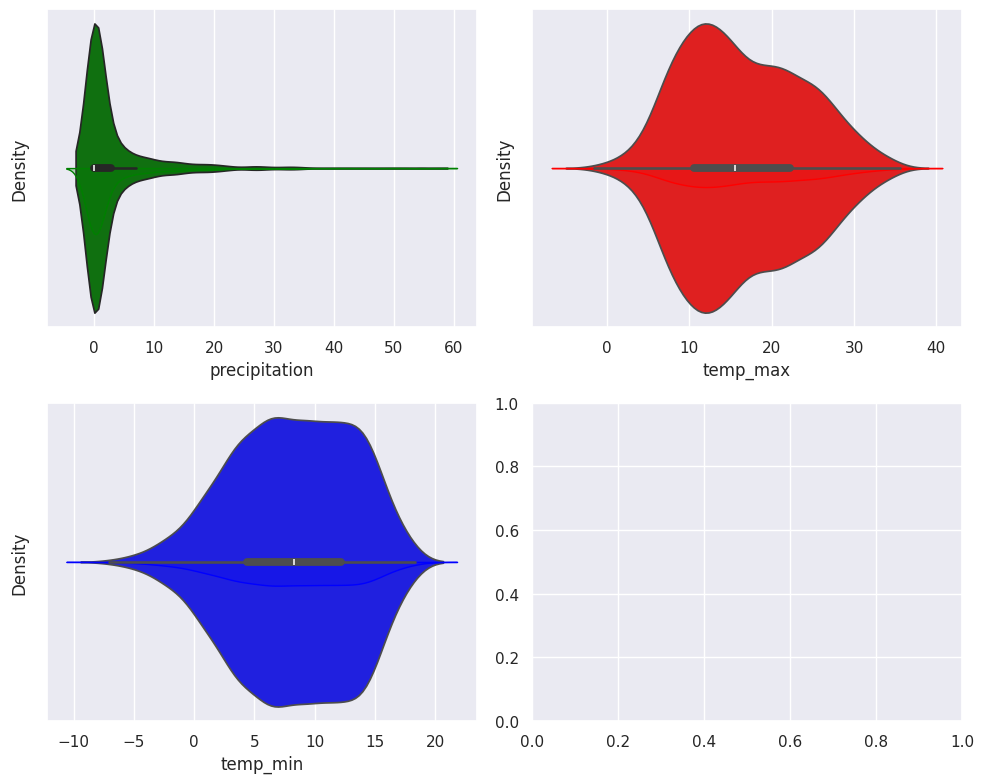

In [ ]:
import seaborn as sns  #for the skewnewss of data
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.violinplot(data=data, x='precipitation', ax=axs[0, 0], color='green')
sns.kdeplot(data=data['precipitation'], ax=axs[0, 0], color='green', shade=True)

sns.violinplot(data=data, x='temp_max', ax=axs[0, 1], color='red')
sns.kdeplot(data=data['temp_max'], ax=axs[0, 1], color='red', shade=True)

sns.violinplot(data=data, x='temp_min', ax=axs[1, 0], color='blue')
sns.kdeplot(data=data['temp_min'], ax=axs[1, 0], color='blue', shade=True)

plt.tight_layout()
plt.show()


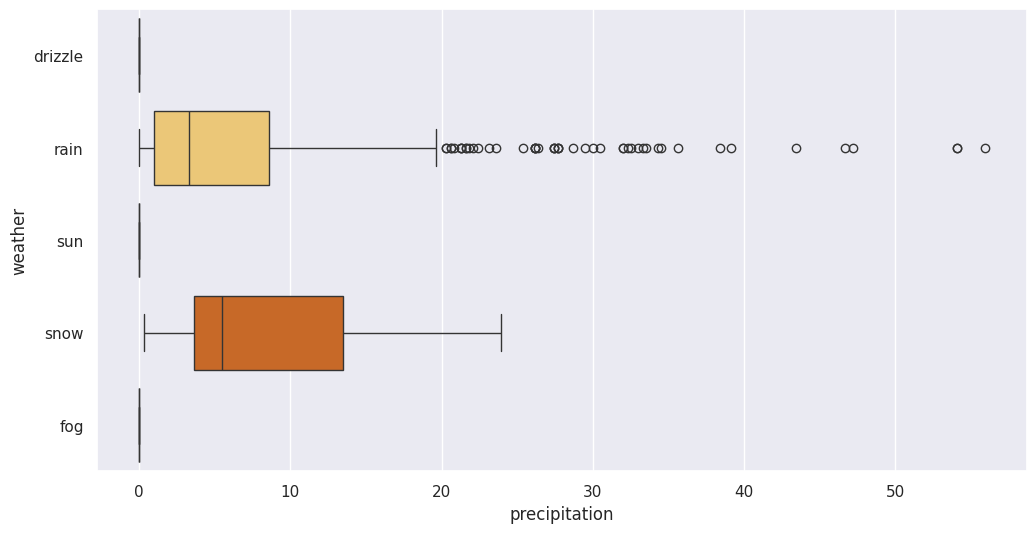

In [ ]:
plt.figure(figsize=(12,6)) #Boxplot analysis
sns.boxplot(x='precipitation', y='weather', data=data, palette='YlOrBr')
plt.show()


<Axes: xlabel='temp_max', ylabel='weather'>

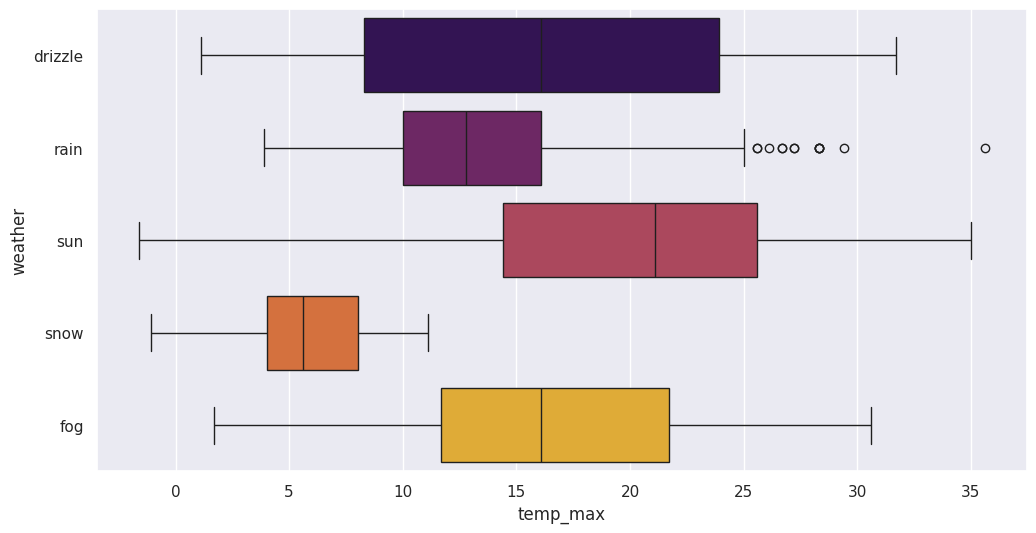

In [ ]:
plt.figure(figsize=(12,6))  #every attribute is having positive outlier
sns.boxplot(x='temp_max', y='weather', data=data, palette='inferno')


<Axes: xlabel='wind', ylabel='weather'>

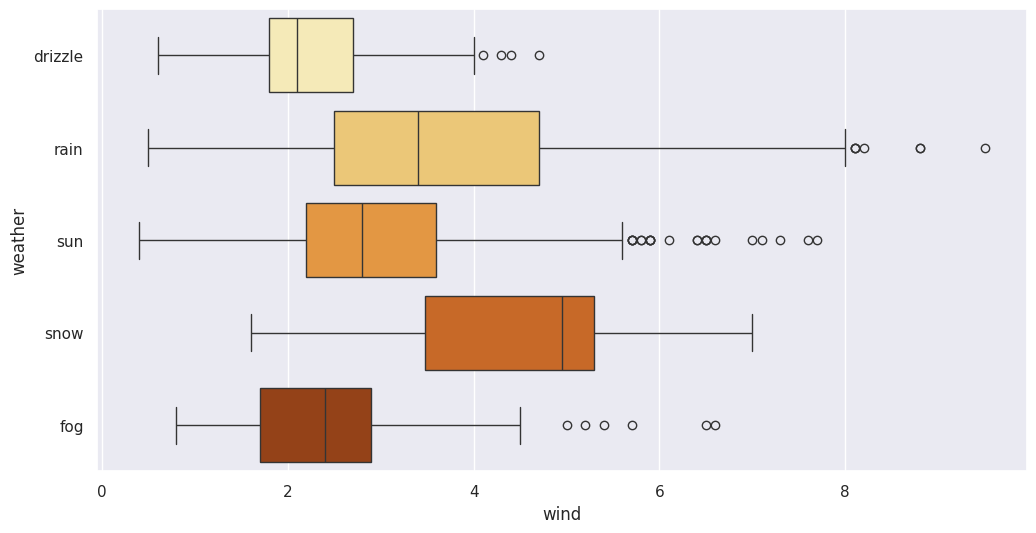

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='wind', y='weather', data=data, palette='YlOrBr')


<Axes: xlabel='temp_min', ylabel='weather'>

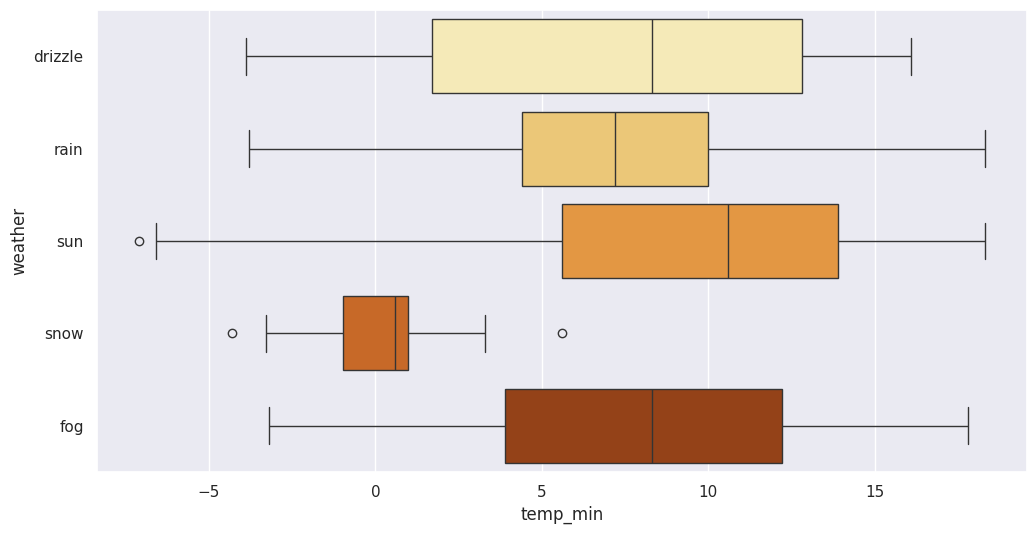

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='temp_min', y='weather', data=data, palette='YlOrBr')


<Axes: >

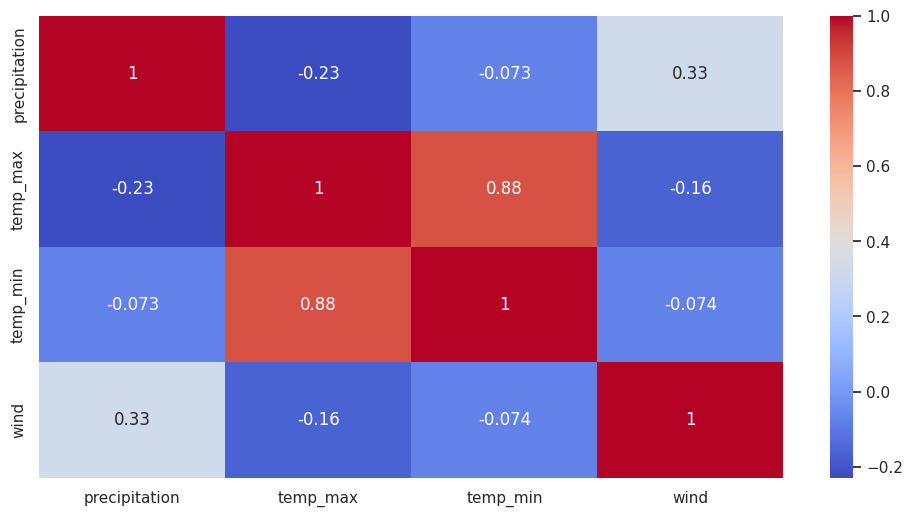

In [ ]:
import numpy as np
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns Heatmap
plt.figure(figsize=(12, 6))           #There is positive corelation between temprature max and temprature min means is one attriribute is increases another is also increase
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')


pearsons correlation:  -0.22855481643297046
T test and P value:  TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


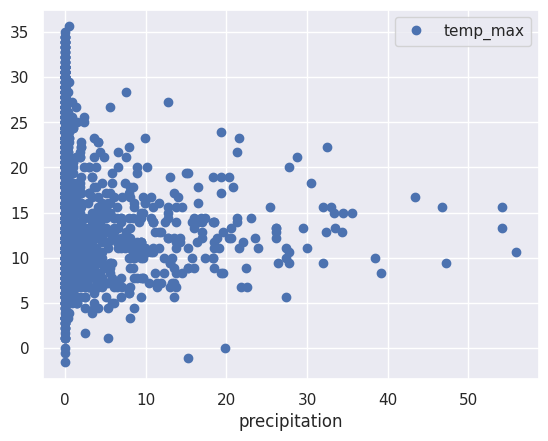

In [ ]:
data.plot("precipitation",'temp_max',style='o')  #there is negetive corelation between them
print('pearsons correlation: ',data['precipitation'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['precipitation'],data['temp_max']))

pearsons correlation:  -0.16485663487495486
T test and P value:  TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


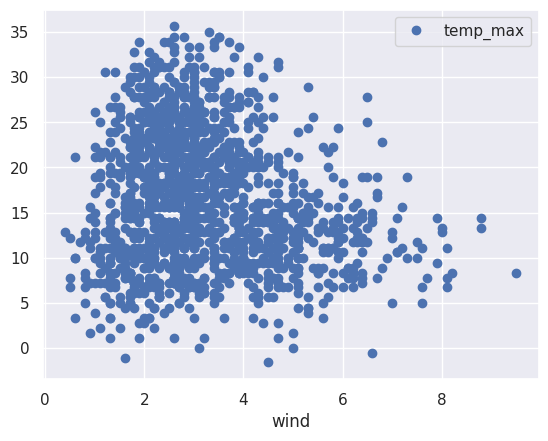

In [ ]:
data.plot("wind",'temp_max',style='o')  #weak negetive coorelation and there is significant diffrence between them
print('pearsons correlation: ',data['wind'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['wind'],data['temp_max']))

<Axes: xlabel='temp_max'>

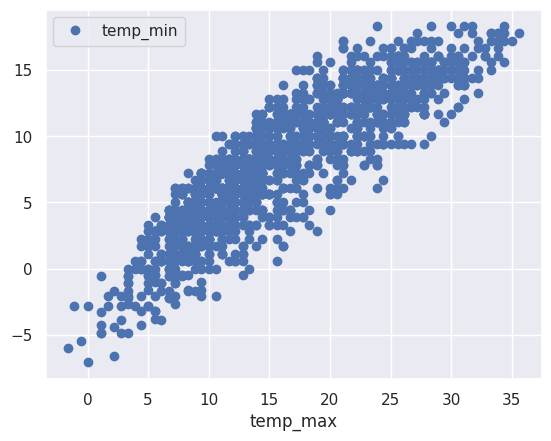

In [ ]:
data.plot('temp_max','temp_min',style='o')

In [ ]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

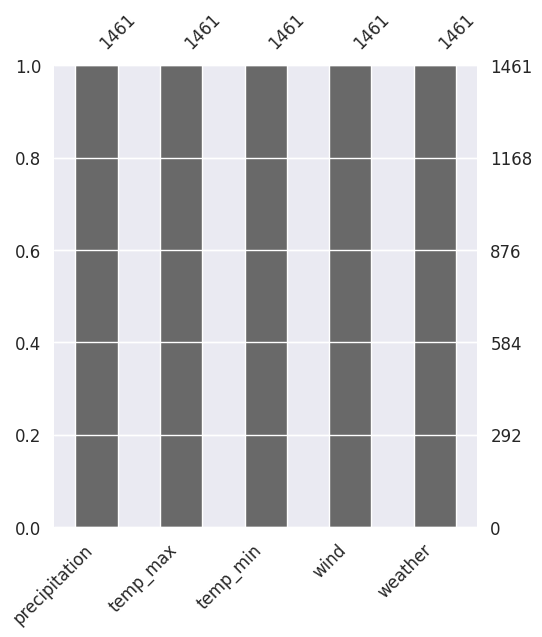

In [ ]:
plt.figure(figsize=(12,6))   #date colomn is not needed for us so we are dropping it
axz=plt.subplot(1,2,2)
mso.bar(data.drop(['date'],axis=1),ax=axz,fontsize=12)

In [ ]:
data=data.drop(['date'],axis=1)

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns and for outlier detection
Q1 = numeric_data.quantile(0.25)                      #detect and removing the outliers
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
import numpy as np    #square root of a variable is a common transformation technique used to stabilize variance, especially when the data has a right-skewed distribution
data.precipitation=np.sqrt(data.precipitation) #for improoving suitability of data
data.wind=np.sqrt(data.wind)

<Axes: xlabel='wind', ylabel='Count'>

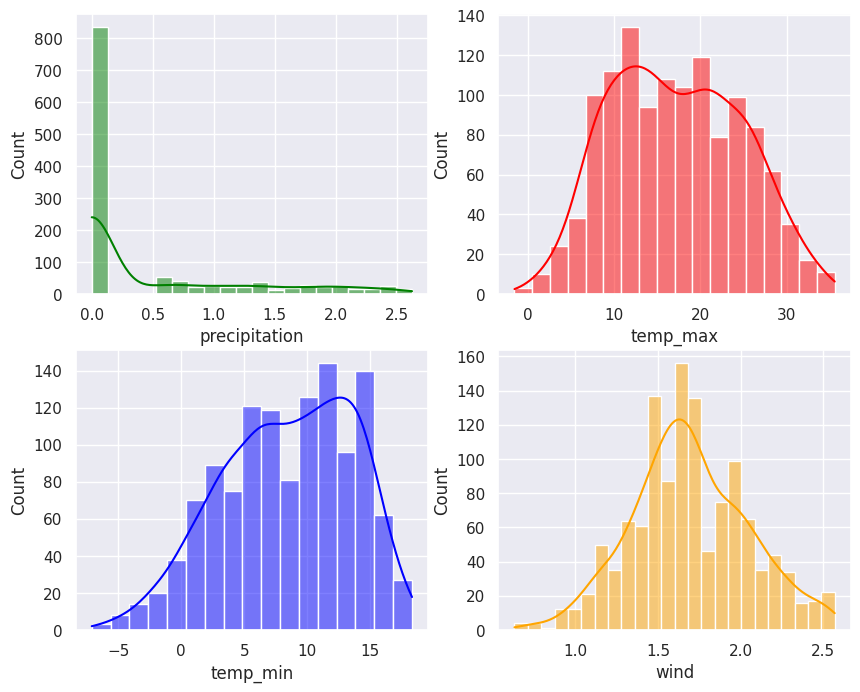

In [ ]:
sns.set(style='darkgrid')
fig, axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

In [ ]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


In [ ]:
lc=LabelEncoder()   #Label Encoding convert categorical data into numerical format
data['weather']=lc.fit_transform(data['weather'])  #rainy=2 drizzle=0

In [ ]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2


In [ ]:
x=((data.loc[:,data.columns!='weather']).astype(int)).values[:,0:]
y=data['weather'].values

In [ ]:
data.weather.unique()

array([0, 2, 4, 3, 1])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming x_train, x_test, y_train, y_test are your training and test sets
# Create and train KNN classifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Generate classification report
report = classification_report(y_test, y_pred)

print(report)

# Calculate and print KNN accuracy
print('KNN accuracy:{:.2f}%'.format(knn.score(x_test,y_test)*100))


True Positives: [  1   5  57   1 119]
True Negatives: [238 217 154 243  72]
False Positives: [ 3  8 19  0 34]
False Negatives: [ 5 17 17  3 22]
              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.38      0.23      0.29        22
           2       0.75      0.77      0.76        74
           3       1.00      0.25      0.40         4
           4       0.78      0.84      0.81       141

    accuracy                           0.74       247
   macro avg       0.63      0.45      0.49       247
weighted avg       0.73      0.74      0.73       247

KNN accuracy:74.09%


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming x_train, x_test, y_train, y_test are your training and test sets
# Create and train SVM classifier
svm = SVC()
svm.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(x_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

print("True Positives:", TP)  # For example, if your model predicts a certain day to have "rain" as the weather class, and the actual class for that day is also "rain," then it's a true positive (TP). If the model predicts "rain" but the actual class is different (e.g., "sun"), then it's a false positive (FP). If the model predicts a non-"rain" class and the actual class is also non-"rain," then it's a true negative (TN). If the model predicts a non-"rain" class but the actual class is "rain," then it's a false negative (FN).
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Generate classification report
report = classification_report(y_test, y_pred)

print(report)

# Calculate and print SVM accuracy
print('SVM accuracy:{:.2f}%'.format(svm.score(x_test,y_test)*100))


True Positives: [  0   0  51   0 130]
True Negatives: [241 225 154 243  59]
False Positives: [ 0  0 19  0 47]
False Negatives: [ 6 22 23  4 11]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        22
           2       0.73      0.69      0.71        74
           3       0.00      0.00      0.00         4
           4       0.73      0.92      0.82       141

    accuracy                           0.73       247
   macro avg       0.29      0.32      0.31       247
weighted avg       0.64      0.73      0.68       247

SVM accuracy:73.28%


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming x_train, x_test, y_train, y_test are your training and test sets
# Create and train Gradient Boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

# Make predictions on the test set
y_pred = gbc.predict(x_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Generate classification report
report = classification_report(y_test, y_pred)

print(report)

# Calculate and print GBC accuracy
print('GBC accuracy:{:.2f}%'.format(gbc.score(x_test,y_test)*100))


True Positives: [  1   0  55   3 134]
True Negatives: [241 225 164 243  61]
False Positives: [ 0  0  9  0 45]
False Negatives: [ 5 22 19  1  7]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.00      0.00      0.00        22
           2       0.86      0.74      0.80        74
           3       1.00      0.75      0.86         4
           4       0.75      0.95      0.84       141

    accuracy                           0.78       247
   macro avg       0.72      0.52      0.56       247
weighted avg       0.73      0.78      0.74       247

GBC accuracy:78.14%


In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming x_train, x_test, y_train, y_test are your training and test sets
# Create and train XGBoost classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(x_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Generate classification report
report = classification_report(y_test, y_pred)

print(report)

# Calculate and print XGB accuracy
print('XGB accuracy:{:.2f}%'.format(xgb_model.score(x_test, y_test) * 100))


True Positives: [  2   2  55   4 122]
True Negatives: [238 222 157 242  67]
False Positives: [ 3  3 16  1 39]
False Negatives: [ 4 20 19  0 19]
              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.40      0.09      0.15        22
           2       0.77      0.74      0.76        74
           3       0.80      1.00      0.89         4
           4       0.76      0.87      0.81       141

    accuracy                           0.75       247
   macro avg       0.63      0.61      0.59       247
weighted avg       0.72      0.75      0.72       247

XGB accuracy:74.90%


In [ ]:
input=[[10.9,10.6,2.8,4.5]]
ot=gbc.predict(input)
print('the weather is:')
if(ot==0):
  print('Drizzle')
elif (ot==1):
  print('fogg')
elif (ot==2):
  print('rain')
elif (ot==3):
  print('snow')
else:
  print('sun')

the weather is:
rain
